In [137]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
iris = pd.read_csv("C:\\Users\\vatsal lalcheta\\Desktop\\study related\\DataSets\\Iris_Dataset.csv")

cluster_data = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].copy(deep=True)
cluster_data.dropna(axis = 0, inplace = True)
# cluster_data.sort_values(by=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], inplace = True)
cluster_array = np.array(cluster_data)

In [139]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [140]:
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters     

In [141]:
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [142]:
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [143]:
k = 3
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
prev = round(np.mean(calc_centroid_variance(clusters, cluster_array)))
print(0, prev)
i = 1
x = 0
while prev != pres:
    prev = x
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    x = round(cluster_var)
    print(i, x)
    i+=1

# print("centroids" , np.array(centroids).shape)

0 187.0
1 34.0
2 27.0
3 26.0
4 26.0


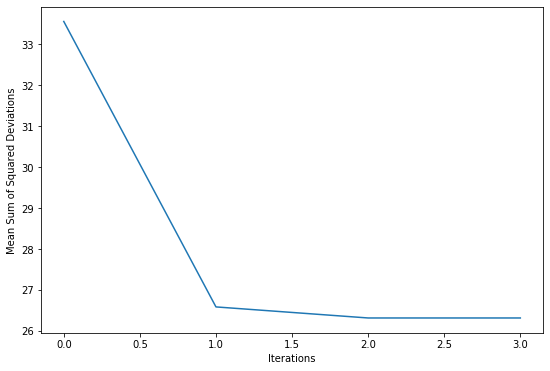

In [144]:
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
# plt.savefig('mean_ssd', bpi=150)

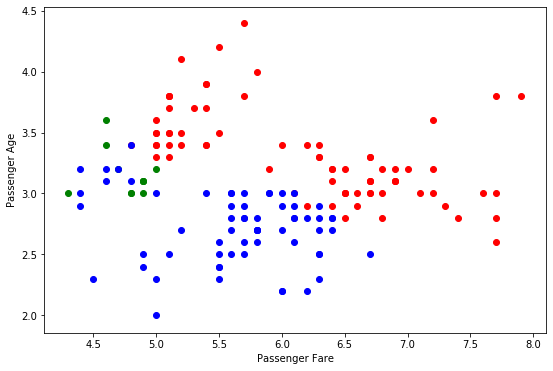

In [145]:
colors = ['green', 'blue', 'red']
plt.subplots(figsize=(9,6))
for i in range(len(cluster_array)):
    plt.scatter(x=cluster_array[i][0], y=cluster_array[i][1], 
            c=colors[initial_clusters[i]], cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
# plt.savefig('initial_clusters', bpi=150)

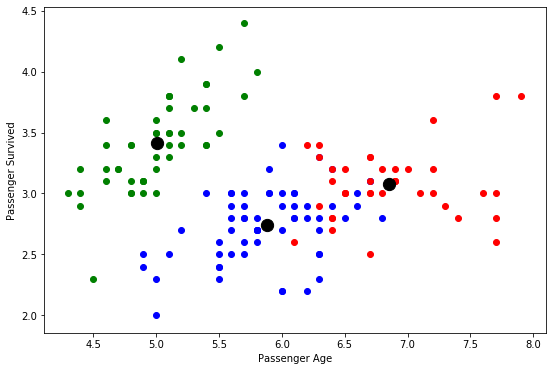

In [146]:
plt.subplots(figsize=(9,6))
# centroids = np.array(centroids)

for i in range(len(cluster_array)):
    plt.scatter(x=cluster_array[i][0], y=cluster_array[i][1], c=colors[clusters[i]], cmap=plt.cm.Spectral);
centers_new = np.array(centroids)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='o', c='black', s=150)
# plt.scatter(x = centroids[:][1], y = centroids[:][0], marker = 'x', c="black", s=150)
plt.xlabel('Passenger Age')
plt.ylabel('Passenger Survived');
# plt.savefig('final_clusters', bpi=150)

In [147]:

for i in centroids:
    for j in i:
        print(j, end=" ")
    print()

5.005999999999999 3.4180000000000006 1.464 0.2439999999999999 
5.88360655737705 2.740983606557377 4.388524590163935 1.4344262295081966 
6.853846153846153 3.0769230769230766 5.715384615384615 2.053846153846153 
